# Computer vision - Filtros (solución)

En este ejercicio aprenderemos a trabjar con imágenes utilizando la [librería OpenCV](http://opencv.org/). El mismo está divido en las siguientes partes:
1. Pantalla verde
2. Transformaciones geométricas
3. **Filtros**
4. Bordes
5. Hough
6. Detección de esquinas

## Resumen
En esta parte del ejercicio aplicaremos distintos filtros sobre una imagen como parte del pre-procesamiento que usualmente se hace.

Seguiremos los siguientes pasos:
1. Cargar imagen
2. Filtro Gaussian-blur
3. Filtro pasa bajo
4. Canny

## 1 - Cargar imagen

Importamos las librerías necesarias y cargamos la imagen con la que trabajaremos. En esta oportunidad trabajaremos con una imagen de la torre Eiffel.

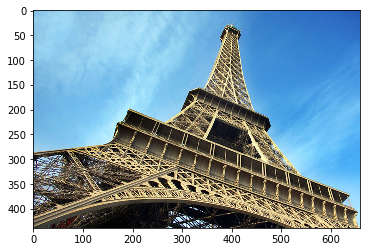

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

image = cv2.imread("photos/eiffel.jpeg")
image = np.copy(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

Transformar la imagen a gris ya que el color no es necesario para los filtros que queremos aplicar.

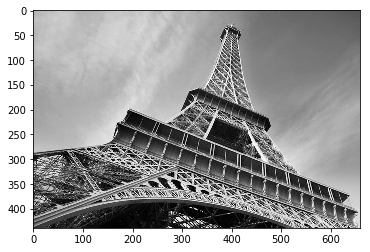

In [2]:
### SOLUCIÓN
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray, cmap='gray')

## 2 - Filtro Gaussian-blur
El filtro [Gaussian-blur](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=gaussianblur#cv2.GaussianBlur) es un filtro pasa bajo. Aplicar un filtro sobre la imagen con un kernel de 5x5 y sigma 0.

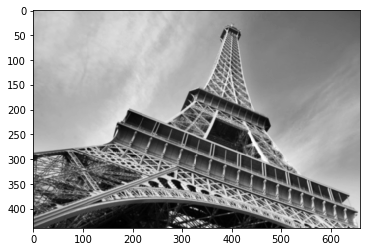

In [3]:
### SOLUCIÓN
gray_blur = cv2.GaussianBlur(gray,(5,5),0)
plt.imshow(gray_blur, cmap='gray')

** ¿Para qué sirve un filtro pasa bajo? ***

** Respuesta: ** Reduce el ruido.

** ¿Qué pasa si se aumenta el tamaño del kernel? ***

** Respuesta: ** La imagen se vuelve más difusa.

## 3 - Filtro pasa alto
Utilizar un array de numpy para crear un filtro Sobel de 3x3 y con los siguientes valores:
    -1  0  1
    -2  0  2
    -1  0  1
    
Aplicar el filtro creado con la [función filter2D](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/filtering.html?highlight=filter2d#cv2.filter2D). Usar bit-depth -1.

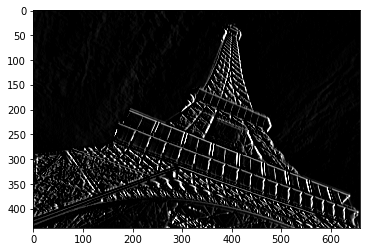

In [4]:
### SOLUCIÓN
sobel_kernel = np.array([
    [-1,0,1],
    [-2,0,2],
    [-1,0,1]
])
#Params: imagen en blanco y negro, bit-depth, kernel
filtered_image = cv2.filter2D(gray_blur,-1,sobel_kernel)
plt.imshow(filtered_image, cmap='gray')

Utilizar la [función treshold](https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#cv2.threshold) para resaltar los bordes detectados. Pasaremos todos los bordes que están en tonos de gris a blanco.

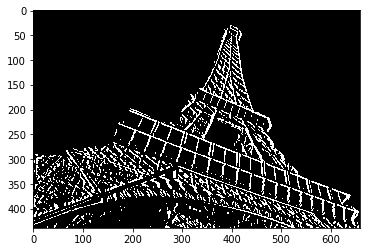

In [5]:
### SOLUCIÓN
retval,binary_image = cv2.threshold(filtered_image,50,255,cv2.THRESH_BINARY)
plt.imshow(binary_image, cmap='gray')

Ahora crear un nuevo filtro en la dirección Y con los mismos valores y aplicarlo sobre la imagen original.

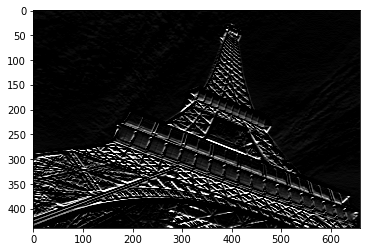

In [6]:
### SOLUCIÓN
sobel_kernel = np.array([
    [-1,-2,-1],
    [0,0,0],
    [1,2,1]
])

filtered_image_2 = cv2.filter2D(gray_blur,-1,sobel_kernel)
plt.imshow(filtered_image_2, cmap='gray')

Aplicar nuevamente la función treshold para resaltar los bordes detectados.

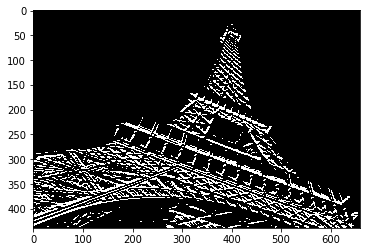

In [7]:
### SOLUCIÓN
retval,binary_image_2 = cv2.threshold(filtered_image_2,50,255,cv2.THRESH_BINARY)
plt.imshow(binary_image_2, cmap='gray')

Ahora superpongo todos los bordes detectados en una única imagen.

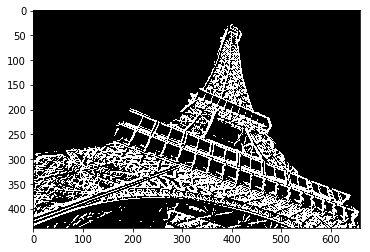

In [8]:
edges = binary_image_2 + binary_image
plt.imshow(edges, cmap='gray')

## 4 - Canny
Ahora aplicamos el filtro Canny sobre una imagen para detectar los bordes.

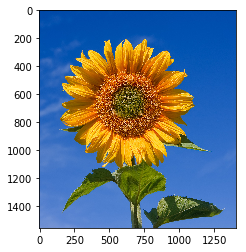

In [9]:
image = cv2.imread("photos/sunflower.jpg")
image = np.copy(image)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
plt.imshow(image)

Para aplicar el filtro hay que pasar la imagen a blanco y negro y definir umbrales para la detección de los bordes.

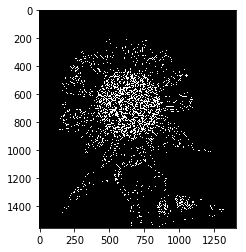

In [10]:
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
#Umbrales para la histéresis de Canny
lower=120
upper=240
edges2 = cv2.Canny(gray,lower,upper)
plt.imshow(edges2, cmap='gray')

Probar con distintos umbrales para ver el efecto en la detección de los bordes.

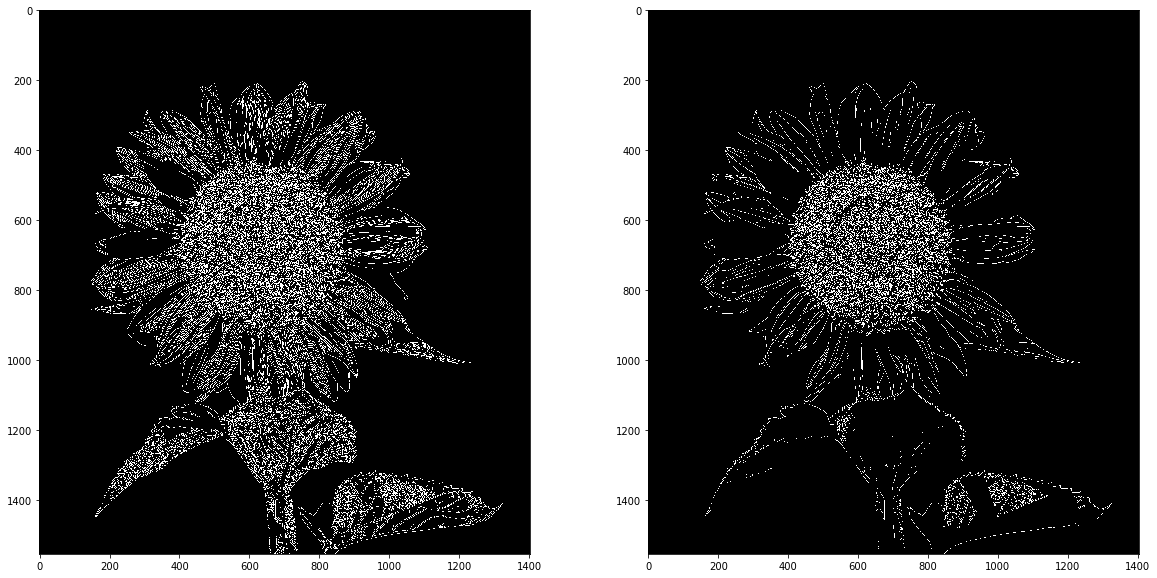

In [11]:
### SOLUCIÓN
wide = cv2.Canny(gray,30,100)
tight = cv2.Canny(gray,220,240)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(wide, cmap='gray')
ax2.imshow(tight, cmap='gray')